# Parcial I - Métodos Computacionales

**2025-1**

---

Nombre: Orly de Jesus Rivera Cruz

Identificación: 1137977500

---

* ⚠ Explique su código usando con comentarios,

* ❗Todas las funciones deben tener documentación básica,

* 🛑 El uso de IA's no está permitido,

* ⚛ La interpretación del enunciado hace parte de la evaluación,

* ⏲ Este parcial tiene una duración de 2 horas

In [1]:
# Librerias útiles
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import factorial
from scipy.optimize import root_scalar, newton, bisect # Funciones para raices

## Ayudas
# np.sign (Signo de una variable)
# np.deg2rad (Convertir grados a radianes)
# pd.Dataframe Genera un dataframe a partir de un diccionario o listas
# range(0, 10, 2) (Pasos de 2 comenzando en 0 hasta 10)

# 1

**(40 puntos)** El **método de Ridder** es un algoritmo de búsqueda de raíces que, como la bisección, requiere un intervalo $[a, b]$ tal que $f(a) \cdot f(b) < 0$. A diferencia de la bisección, Ridder introduce una corrección exponencial para acelerar la convergencia, logrando **convergencia cuadrática** sin requerir derivadas.

---
### Pasos para implementar

1. **Definir la función** $f(x)$ y un intervalo $[a, b]$ tal que:

   - $f(a) \cdot f(b) < 0$ (la función tiene signos opuestos en los extremos del intervalo).
   - La función debe ser continua en $[a, b]$.

2. **Calcular el punto medio**:

   $$
   m = \frac{a + b}{2}
   $$

3. **Calcular la corrección exponencial**:

   - Evaluar $f(a)$, $f(b)$ y $f(m)$.
   - Calcular:

     $$
     s = \sqrt{f(m)^2 - f(a) f(b)}
     $$

   - Si $s = 0$, detener: la raíz no puede estimarse en esta iteración.

   - Calcular el nuevo candidato a raíz:

     $$
     x = m + \frac{(m - a) f(m)}{s} \cdot \text{sign}(f(a) - f(b))
     $$

4. **Evaluar $f(x)$** y actualizar el intervalo:

   - Si $f(m) \cdot f(x) < 0$, entonces la nueva raíz está entre $m$ y $x$.
   - Si $f(a) \cdot f(x) < 0$, entonces actualizar $b = x$, luego $f(b) = f(x)$.
   - Si $f(b) \cdot f(x) < 0$, entonces actualizar $a = x$, luego $f(a) = f(x)$.
   - En cada paso mantener la condición $f(a) \cdot f(b) < 0$.

5. **Criterio de parada**:

   - Repetir los pasos anteriores hasta que se alcance la tolerancia deseada:

     $$
     |f(x)| < \varepsilon \quad \text{o} \quad |b - a| < \delta
     $$

   donde $\varepsilon$ y $\delta$ son tolerancias establecidas por el usuario.

---

* Defina una función llamada `Ridder` que calcule la raiz de una función dada. Su función debe tener documentación y retornar el valor de la raiz junto con el número de iteraciones empleadas para alcanzar la convergencia dada una tolerancia.

* Usando
$$\cos(x) = x,$$

Grafique la función para $0\leq x \leq \pi/2$ usando 100 puntos. Luego, cree un DataFrame con los datos de $x$ y $f(x)$, y encuentre una primera aproximación a la raiz aplicando un filtro en el dataframe con los valores más cercanos a cero.

* Usando el método de Ridder encuentre la raiz númericamente y compare su resultado usando el método de bisección y secante.

* Para las siguientes tolerancias (ver código) realice un gráfico usando escala logaritimica en $y$ de cuantas iteraciones son necesarias hasta alcanzar la convergencia. ¿Qué puede concluir acerca de la misma?

```python
# Tolerancias
tol = np.logspace(-1, -20, 20)

# Grafico semilog

plt.semilogy(N, tol)

```


-----------------------Grafica de la función-------------------------


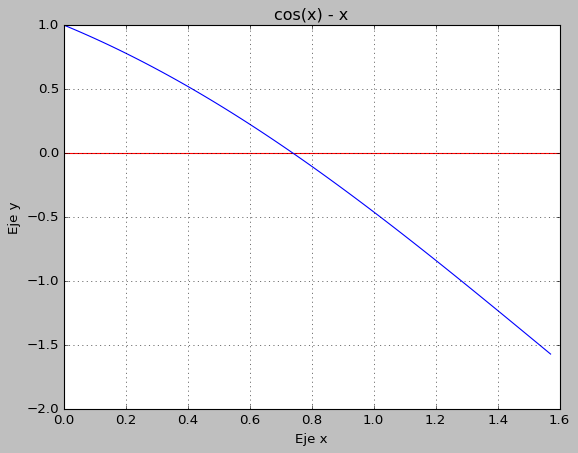


-------------------------Tabla de la función---------------------------

Tabla de imagenes cercanas al 0
    Preimagen    Imagen
45   0.713998  0.041751
46   0.729865  0.015399
47   0.745732 -0.011140
48   0.761598 -0.037864

Podemos destacar que estara entre los valores 0.729 y 0.745

-----------------------Puntos de intersección-------------------------
El punto de intersección es: 0.7390851332098146 
Al codigo le tomo de iteraciones: 3

Siguiendo el metodo de bisección da: 0.7390851332152737
SIguiendo el metodo de la secante da: 0.7390851332151607


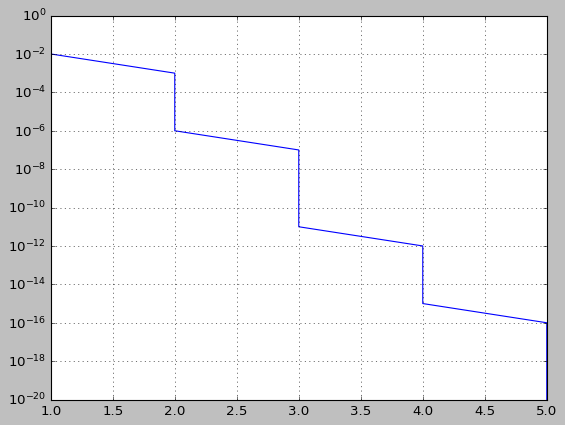

In [124]:
# Punto 1:

"""
Función cos(x) - x

Entrada:
x --> Numeros reales en el intervalo [ 0 , pi/2 ]

Salida:
f(x) --> Imagenes de la funcion cos(x) - x en el intervalo [ 0 , pi/2 ]
"""

def f(x):
  return np.cos(x) - x

"""
Función Ridder

Entrada:
f --> Imagenes de la funcion cos(x) - x en el intervalo [ 0 , pi/2 ]
a --> Valor en x delimitador 1
b --> Valor en x delimitador 2
t --> Tolerancia de nuestra raiz
i --> Numero de iteraciones maximo

Salida:
x0 --> Raiz truncada por nuestra tolerancia
it --> Numero de iteraciones hechas
"""


def Ridder(f,a,b,t,i):

  it = 0

  for n in range(1,i):

    if f(a) * f(b) > 0:
     return print("ERROR")
    else:
      pass

    m=(a+b)/2
    s = ( (f(m))**2 - f(a)*f(b))**(1/2)

    if s == 0:
      return print("No es posible determinar en esta iteración")
    else:
      it+=1
      x0 = m + ((m-a) * f(m) / s) * np.sign(f(a)-f(b))

    if abs(f(x0)) < t or abs(a-b) < t:
      return x0 , it
    else:
      pass

    #-------

    if f(m) * f(x0) < 0:
       a=m
       b=x0
    elif f(a) * f(x0):
       b = x0
    else:
       a = x0

  return print("Diverge")

Raiz , NdeI = Ridder(f,0,np.pi/2,1e-10,100)

x = np.linspace(0,np.pi/2,100)

print("\n-----------------------Grafica de la función-------------------------")
plt.style.use("classic")
plt.title("cos(x) - x")
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.axhline(0,color = "red")
plt.plot(x , f(x))
plt.grid()
plt.show()

print("\n-------------------------Tabla de la función---------------------------")

Tabla = pd.DataFrame({"Preimagen" : x,"Imagen" : f(x)})

print("\nTabla de imagenes cercanas al 0")
print(Tabla[abs(Tabla["Imagen"]) < 0.05])
print("\nPodemos destacar que estara entre los valores 0.729 y 0.745")

print("\n-----------------------Puntos de intersección-------------------------")

print("El punto de intersección es:",Raiz ,"\nAl codigo le tomo de iteraciones:", NdeI)

print("\nSiguiendo el metodo de bisección da:" , bisect(f,0,np.pi/2))
print("SIguiendo el metodo de la secante da:" , newton(f,x0=0,x1=np.pi/2))

tol = np.logspace(-1, -20, 20)
N = []

print("\n-----------------------Puntos de intersección-------------------------")

for to in tol:
  N.append(Ridder(f,0,np.pi/2,to,100)[1])
plt.grid()
plt.semilogy(N, tol)
plt.show()

#2

**(60 puntos)** En óptica, cuando un rayo de luz atraviesa la interfaz entre dos medios con diferentes índices de refracción, su dirección cambia según la ley de Snell. Para el caso de un prisma triangular, cuando un rayo emerge después de dos refracciones, el ángulo de desviación total $\delta$ está dado por:

$$\delta(\theta_i) = \theta_i + \arcsin\left(n\sin\left(A - \arcsin\left(\frac{\sin\theta_i}{n}\right)\right)\right) - A$$

donde $\theta_i$ es el ángulo de incidencia, $n$ es el índice de refracción del prisma y $A$ es el ángulo del prisma.

La derivada de esta función con respecto al ángulo de incidencia $\theta_i$ es:

$$\frac{d\delta}{d\theta_i} = 1 - \frac{\cos\theta_i \cdot \cos(A-\theta_r)}{\cos\theta_r \cdot \sqrt{1-n^2\sin^2(A-\theta_r)}}$$

donde $\theta_r = \arcsin\left(\frac{\sin\theta_i}{n}\right)$ es el ángulo de refracción en la primera interfaz.

Considere un prisma de vidrio crown con $n = 1.52$ y $A = 60°$.

### Parte A:
* Escriba una función explicita y documentada para $\frac{d\delta}{d\theta_i}$

* Realice un gráfico para $\frac{d\delta}{d\theta_i}$ y encuentre el ángulo de incidencia $\theta_i$ que produce el ángulo de desviación mínimo para $\theta_i \in [30°, 80°]$.

* Use el método de Newton-Raphson (sin derivada) y el método de la secante para hallar el ángulo de desviación mínimo.


### Parte B:
* Determine el ángulo crítico $\theta_c$ para el cual el rayo comienza a experimentar reflexión interna total en la segunda interfaz del prisma. Esta condición ocurre cuando:

$$\sin(A - \theta_r) = \frac{1}{n}$$

* Resuelva numéricamente la ecuación anterior para encontrar el ángulo de incidencia $\theta_i$ correspondiente a este ángulo crítico, utilizando el método de la bisección.





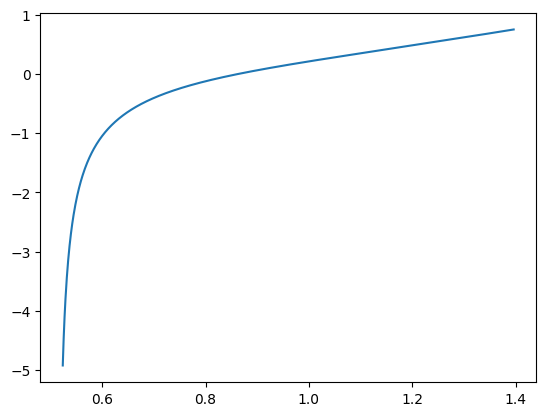


Siguiendo el metodo de newton da: 0.8633131150155535
SIguiendo el metodo de la secante da: 0.8633131150155536
PARTE B:

Siguiendo el metodo de newton da: 0.5136536662197806
SIguiendo el metodo de la secante da: 0.5136536662197776


In [111]:
"""
Función df

Entrada:
tetha --> Espectro de angulos entre [ 30° , 80° ] (En rad)
A --> Angulo de el prisma (Pre-establecida)
n --> Indice de refracción (Pre-establecida)

Salida:
x0 --> Raiz truncada por nuestra tolerancia
it --> Numero de iteraciones hechas
"""
def df(tetha , A = np.deg2rad(60), n = 1.52):
  tethar = np.arcsin(np.sin(tetha)/n)
  return 1 - ((np.cos(tetha) * np.cos( A - tethar)) / (np.cos(tethar) * (1-((n**2)*((np.sin( A - tethar))**2)))**(1/2)))

x = np.linspace(np.deg2rad(30),np.deg2rad(80),1000)

plt.plot(x,df(x))
plt.show()

print("\nSiguiendo el metodo de newton da:" , newton(df,x0 = 1))
print("SIguiendo el metodo de la secante da:" , newton(df,x0=0.6,x1=0.8))

print("PARTE B:")

def cri(tetha , A = np.deg2rad(60), n = 1.52):
  tethar = np.arcsin(np.sin(tetha)/n)
  return np.sin( A - tethar ) - (1/n)

print("\nSiguiendo el metodo de newton da:" , newton(cri,x0 = 1))
print("SIguiendo el metodo de la secante da:" , newton(cri,x0=0.6,x1=0.8))